In [131]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import seaborn as sns

In [13]:
data, target = fetch_california_housing(as_frame=True, return_X_y=True)

In [16]:
data.shape

(20640, 8)

In [144]:
# user-defined parameters
n_train = 10000
n_val = 1000
n_test = 1000

In [145]:
# start train index is generated randomly and we make sure
# to leave space of the validation and test
idx_train_start = np.random.randint(0, len(data) - n_train - n_val - n_test)
idx_train_end = idx_train_start + n_train

# validation set is adjacent to the train set
idx_val_start = idx_train_end
idx_val_end = idx_val_start + n_val

# test set can be at any point after the validation set
# it doesn't need to be adjacent to it
idx_test_start = np.random.randint(idx_val_end, len(data) - n_test)
idx_test_end = idx_test_start + n_test

In [146]:
# split data
X_train = data.iloc[idx_train_start:idx_train_end]
X_val = data.iloc[idx_val_start:idx_val_end]
X_test = data.iloc[idx_test_start:idx_test_end]

# split targets
y_train = target.iloc[idx_train_start:idx_train_end]
y_val = target.iloc[idx_val_start:idx_val_end]
y_test = target.iloc[idx_test_start:idx_test_end]

In [147]:
# fitting the model
clf = LinearRegression()
clf.fit(X_train, y_train)

LinearRegression()

In [148]:
y_train_pred = clf.predict(X_train)
y_val_pred = clf.predict(X_val)
y_test_pred = clf.predict(X_test)

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_val = mean_absolute_error(y_val, y_val_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

In [149]:
print(mae_train)
print(mae_val)
print(mae_test)

0.5667026213353056
0.4917145439312001
0.6803020855098186


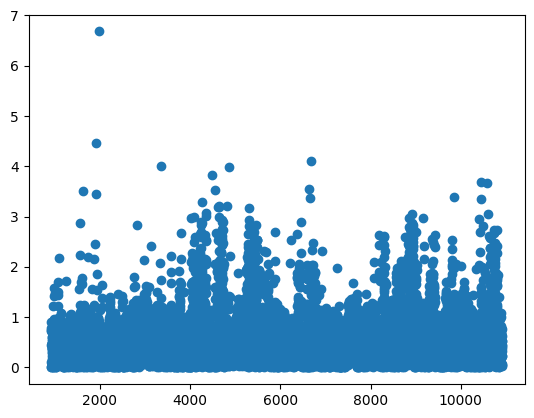

In [150]:
plt.scatter(y_train.index, np.abs(y_train - y_train_pred))

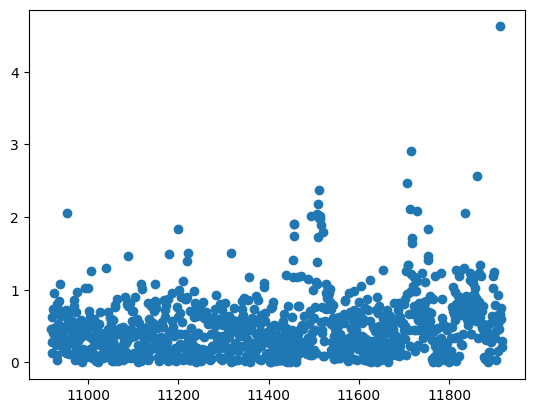

In [151]:
plt.scatter(y_val.index, np.abs(y_val - y_val_pred))

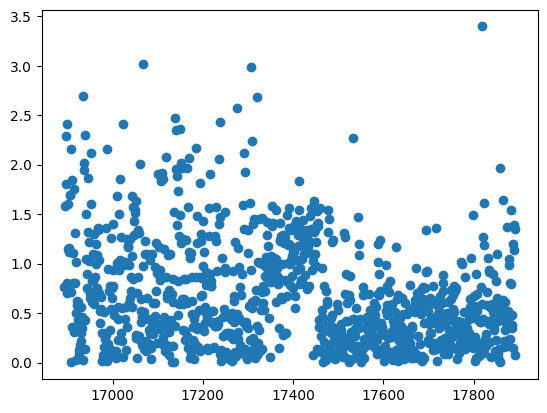

In [152]:
plt.scatter(y_test.index, np.abs(y_test - y_test_pred))

In [153]:
train_errors = np.abs(y_train - y_train_pred)
val_errors = np.abs(y_val - y_val_pred)
test_errors = np.abs(y_test - y_test_pred)

train_errors_df = pd.DataFrame(train_errors)
train_errors_df['partition'] = 'train'

val_errors_df = pd.DataFrame(val_errors)
val_errors_df['partition'] = 'val'

test_errors_df = pd.DataFrame(test_errors)
test_errors_df['partition'] = 'test'

errors_df = pd.concat([train_errors_df, val_errors_df, test_errors_df])
errors_df['index'] = errors_df.index
errors_df = errors_df.rename(columns={"MedHouseVal": "error"})

In [154]:
errors_df

,error,partition,index
918,0.790030,train,918
919,0.111604,train,919
920,0.444645,train,920
921,0.013919,train,921
922,0.897124,train,922
...,...,...,...
17888,1.198794,test,17888
17889,1.138271,test,17889
17890,1.391269,test,17890
17891,1.354350,test,17891


<Axes: xlabel='index', ylabel='error'>

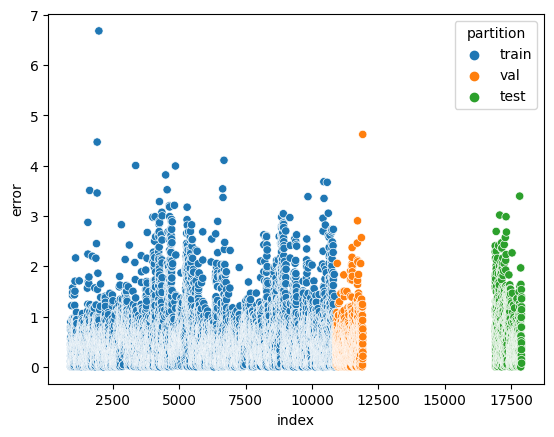

In [155]:
sns.scatterplot(data=errors_df, x='index', y='error', hue='partition')

TODO:

- turn into functions
- validate that this make sense
- elaborate on the plots